<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-Jan2023-Assignments/blob/main/Missing_Values_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing Values Assignment - Arif Aygun

In this assignment, you'll be working with the U.S. Education Dataset from Kaggle. The data gives detailed, state-level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above.

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

### 1- Determine all the variable types and find the fraction of the missing values for each variable. Answer the following questions as you work through this challenge, and then paste a link to your Notebook.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import os
for Dir, Folders, Files in os.walk(os.getcwd()):
  for File in Files:
    if File == 'states_all.csv':
      Path = os.path.join(Dir, File)
      print(Path)

/content/drive/Othercomputers/My MacBook Pro/GitHub/Data Sets/Magnimind/states_all.csv
/content/drive/Othercomputers/My MacBook Pro/GitHub/Magnimind-Jan2023-Assignments/states_all.csv
/content/drive/Othercomputers/My MacBook Pro/GitHub/Magnimind-Assignments/states_all.csv


In [55]:
import pandas as pd
import numpy as np
df = pd.read_csv(Path)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [ ]:
states_df = pd.read_csv(r"/Users/arifaygun/Documents/GitHub/Data Sets/Magnimind/states_all.csv")

In [ ]:
states_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [ ]:
states_df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [ ]:
states_df.info

<bound method DataFrame.info of              PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      16

In [ ]:
states_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [ ]:
states_df.isnull().sum()*100/states_df.shape[0]

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          28.629738
TOTAL_REVENUE                   25.655977
FEDERAL_REVENUE                 25.655977
STATE_REVENUE                   25.655977
LOCAL_REVENUE                   25.655977
TOTAL_EXPENDITURE               25.655977
INSTRUCTION_EXPENDITURE         25.655977
SUPPORT_SERVICES_EXPENDITURE    25.655977
OTHER_EXPENDITURE               28.629738
CAPITAL_OUTLAY_EXPENDITURE      25.655977
GRADES_PK_G                     10.087464
GRADES_KG_G                      4.839650
GRADES_4_G                       4.839650
GRADES_8_G                       4.839650
GRADES_12_G                      4.839650
GRADES_1_8_G                    40.524781
GRADES_9_12_G                   37.551020
GRADES_ALL_G                     4.839650
AVG_MATH_4_SCORE                67.055394
AVG_MATH_8_SCORE                64.897959
AVG_READING_4_SCORE             62

In [ ]:
(states_df.isnull().sum()*100/states_df.shape[0]).sort_values(ascending=False)

AVG_READING_8_SCORE             67.230321
AVG_MATH_4_SCORE                67.055394
AVG_MATH_8_SCORE                64.897959
AVG_READING_4_SCORE             62.099125
GRADES_1_8_G                    40.524781
GRADES_9_12_G                   37.551020
ENROLL                          28.629738
OTHER_EXPENDITURE               28.629738
SUPPORT_SERVICES_EXPENDITURE    25.655977
CAPITAL_OUTLAY_EXPENDITURE      25.655977
INSTRUCTION_EXPENDITURE         25.655977
TOTAL_EXPENDITURE               25.655977
LOCAL_REVENUE                   25.655977
STATE_REVENUE                   25.655977
FEDERAL_REVENUE                 25.655977
TOTAL_REVENUE                   25.655977
GRADES_PK_G                     10.087464
GRADES_KG_G                      4.839650
GRADES_4_G                       4.839650
GRADES_8_G                       4.839650
GRADES_12_G                      4.839650
GRADES_ALL_G                     4.839650
STATE                            0.000000
YEAR                             0

### 2- Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

##### The variables 'YEAR', 'PRIMARY_KEY' and with missing values over 60% will be dropped.
##### The rest of the variables will be filled.

In [ ]:
year_zero_df = states_df.copy()

In [ ]:
year_zero_df.drop(columns=['PRIMARY_KEY','YEAR', 'AVG_MATH_4_SCORE',
                           'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE',
                           'AVG_READING_8_SCORE'], inplace=True)

In [ ]:
fill_df = year_zero_df.fillna(year_zero_df.mean(numeric_only=True))
numeric_cols = year_zero_df.select_dtypes(include='number').columns
fill_df = year_zero_df.fillna(year_zero_df[numeric_cols].mean())
fill_df

,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,ALABAMA,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,7.350360e+05,429950.933824,1.740530e+05,8224.000000,55460.00000,57948.000000,58025.000000,41167.000000,577954.717647,282069.084967,7.316340e+05
1,ALASKA,917541.566176,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,3.509020e+05,429950.933824,3.745100e+04,2371.000000,10152.00000,9748.000000,8789.000000,6714.000000,577954.717647,282069.084967,1.224870e+05
2,ARIZONA,917541.566176,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,1.007732e+06,429950.933824,6.091140e+05,2544.000000,53497.00000,55433.000000,49081.000000,37410.000000,577954.717647,282069.084967,6.734770e+05
3,ARKANSAS,917541.566176,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,4.834880e+05,429950.933824,1.452120e+05,808.000000,33511.00000,34632.000000,36011.000000,27651.000000,577954.717647,282069.084967,4.414900e+05
4,CALIFORNIA,917541.566176,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,429950.933824,2.044688e+06,59067.000000,431763.00000,418418.000000,363296.000000,270675.000000,577954.717647,282069.084967,5.254844e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,VIRGINIA,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,17840.958495,68810.96201,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,9.139695e+05
1711,WASHINGTON,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,17840.958495,68810.96201,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,9.139695e+05
1712,WEST_VIRGINIA,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,17840.958495,68810.96201,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,9.139695e+05
1713,WISCONSIN,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,17840.958495,68810.96201,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,9.139695e+05


In [ ]:
fill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1715 non-null   object 
 1   ENROLL                        1715 non-null   float64
 2   TOTAL_REVENUE                 1715 non-null   float64
 3   FEDERAL_REVENUE               1715 non-null   float64
 4   STATE_REVENUE                 1715 non-null   float64
 5   LOCAL_REVENUE                 1715 non-null   float64
 6   TOTAL_EXPENDITURE             1715 non-null   float64
 7   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 8   SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 9   OTHER_EXPENDITURE             1715 non-null   float64
 10  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 11  GRADES_PK_G                   1715 non-null   float64
 12  GRADES_KG_G                   1715 non-null   float64
 13  GRA

In [ ]:
fill_df.isnull().sum()*100/fill_df.isnull().count()

STATE                           0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
dtype: float64

### 3- Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [ ]:

fill_by_year = states_df.copy()

In [ ]:
for a in list(fill_by_year.columns)[3:]:
    fill_by_year[a] = fill_by_year.groupby(['YEAR'])[a].transform(lambda x: x.fillna(x.mean()))

In [ ]:
fill_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1248 non-null   float64
 4   TOTAL_REVENUE                 1301 non-null   float64
 5   FEDERAL_REVENUE               1301 non-null   float64
 6   STATE_REVENUE                 1301 non-null   float64
 7   LOCAL_REVENUE                 1301 non-null   float64
 8   TOTAL_EXPENDITURE             1301 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1301 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1301 non-null   float64
 11  OTHER_EXPENDITURE             1248 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1301 non-null   float64
 13  GRA

In [ ]:
fill_by_year.isnull().sum()*100/fill_by_year.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          27.230321
TOTAL_REVENUE                   24.139942
FEDERAL_REVENUE                 24.139942
STATE_REVENUE                   24.139942
LOCAL_REVENUE                   24.139942
TOTAL_EXPENDITURE               24.139942
INSTRUCTION_EXPENDITURE         24.139942
SUPPORT_SERVICES_EXPENDITURE    24.139942
OTHER_EXPENDITURE               27.230321
CAPITAL_OUTLAY_EXPENDITURE      24.139942
GRADES_PK_G                      3.090379
GRADES_KG_G                      3.090379
GRADES_4_G                       3.090379
GRADES_8_G                       3.090379
GRADES_12_G                      3.090379
GRADES_1_8_G                    39.358601
GRADES_9_12_G                   36.268222
GRADES_ALL_G                     3.090379
AVG_MATH_4_SCORE                59.825073
AVG_MATH_8_SCORE                59.825073
AVG_READING_4_SCORE             56

In [ ]:
interpolate_df = states_df.interpolate(method ='linear', limit_direction ='both')

In [ ]:
interpolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1715 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1715 non-null   float64
 6   STATE_REVENUE                 1715 non-null   float64
 7   LOCAL_REVENUE                 1715 non-null   float64
 8   TOTAL_EXPENDITURE             1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 11  OTHER_EXPENDITURE             1715 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 13  GRA

In [ ]:
interpolate_df.isnull().sum()*100/interpolate_df.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

### 5- Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?

- In the second question, we combined an imputation technique and a removing of some columns with high % of missing values. We got very general results that may not be accurate without a division by years. As well, we got an error because we have non-numeric variable "STATE" that can not be deleted. Changing "STATE" variable to a numeric would make the DataFrame very wide and difficult to work with.


- In the third question, we used imputation technique but grouped data by yeat that makes the estimates more accurate.


- In the second question, we used an interpolation method that seemed to be the most suitable for this DataFrame.

# OFFICE HOUR SOLUTIONS

In this assignment, you'll be working with the U.S. Education Dataset from Kaggle. The data gives detailed, state-level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above.

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

Determine all the variable types and find the fraction of the missing values for each variable. Answer the following questions as you work through this challenge, and then paste a link to your Notebook.
Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.
This time, fill in the missing values using interpolation (extrapolation).
Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
for Dir, Folders, Files in os.walk(os.getcwd()):
  for File in Files:
    if File == 'states_all.csv':
      Path = os.path.join(Dir, File)
      print(Path)

/content/drive/Othercomputers/My MacBook Pro/GitHub/Data Sets/Magnimind/states_all.csv
/content/drive/Othercomputers/My MacBook Pro/GitHub/Magnimind-Jan2023-Assignments/states_all.csv
/content/drive/Othercomputers/My MacBook Pro/GitHub/Magnimind-Assignments/states_all.csv


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv(Path)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 25 entries, PRIMARY_KEY to AVG_READING_8_SCORE
dtypes: float64(22), int64(1), object(2)
memory usage: 335.1+ KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [6]:
df_datatype = pd.concat([df.dtypes, df.nunique(),
                         round(df.nunique()*100/len(df),2),
                         df.isnull().sum(),
                         round(df.isnull().sum()*100/len(df),2)],
                         axis=1)

df_datatype.columns= ['data type', 'No. of categories', 'No. of categories %', 'missing values', 'missing values %']

df_datatype.sort_values(by= 'missing values %', ascending=False, inplace=True)

In [7]:
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
AVG_READING_8_SCORE,float64,39,2.27,1153,67.23
AVG_MATH_4_SCORE,float64,50,2.92,1150,67.06
AVG_MATH_8_SCORE,float64,57,3.32,1113,64.90
AVG_READING_4_SCORE,float64,43,2.51,1065,62.10
GRADES_1_8_G,float64,1020,59.48,695,40.52
GRADES_9_12_G,float64,1070,62.39,644,37.55
ENROLL,float64,1224,71.37,491,28.63
OTHER_EXPENDITURE,float64,1222,71.25,491,28.63
SUPPORT_SERVICES_EXPENDITURE,float64,1275,74.34,440,25.66
CAPITAL_OUTLAY_EXPENDITURE,float64,1275,74.34,440,25.66


In [8]:
df_datatype = df_datatype.loc[df_datatype['missing values']!=0]
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
AVG_READING_8_SCORE,float64,39,2.27,1153,67.23
AVG_MATH_4_SCORE,float64,50,2.92,1150,67.06
AVG_MATH_8_SCORE,float64,57,3.32,1113,64.90
AVG_READING_4_SCORE,float64,43,2.51,1065,62.10
GRADES_1_8_G,float64,1020,59.48,695,40.52
GRADES_9_12_G,float64,1070,62.39,644,37.55
ENROLL,float64,1224,71.37,491,28.63
OTHER_EXPENDITURE,float64,1222,71.25,491,28.63
SUPPORT_SERVICES_EXPENDITURE,float64,1275,74.34,440,25.66
CAPITAL_OUTLAY_EXPENDITURE,float64,1275,74.34,440,25.66


In [9]:
df_datatype[df_datatype.index == 'AVG_READING_8_SCORE']['data type']

AVG_READING_8_SCORE    float64
Name: data type, dtype: object

### 2.
Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [11]:
import numpy as np
#drop those variable with more than 50% missing values
df_datatype.iloc[np.where(df_datatype['missing values %'] > 50)]

,data type,No. of categories,No. of categories %,missing values,missing values %
AVG_READING_8_SCORE,float64,39,2.27,1153,67.23
AVG_MATH_4_SCORE,float64,50,2.92,1150,67.06
AVG_MATH_8_SCORE,float64,57,3.32,1113,64.90
AVG_READING_4_SCORE,float64,43,2.51,1065,62.10


In [14]:
columns_to_drop = df_datatype.iloc[np.where(df_datatype['missing values %'] > 50)].index

In [15]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

### 3.
Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [16]:
df_time_series = df.copy(deep=True)

In [17]:
df_time_series.groupby('YEAR')['ENROLL'].unique()

YEAR
1986                                                [nan]
1987                                                [nan]
1988                                                [nan]
1989                                                [nan]
1990                                                [nan]
1991                                                [nan]
1992                                                [nan]
1993    [727716.0, 121156.0, 676297.0, 311432.0, 51297...
1994    [730004.0, 123868.0, 708482.0, 312695.0, 41204...
1995    [727480.0, 125421.0, 735018.0, 447757.0, 52994...
1996    [735912.0, 126189.0, 764681.0, 452907.0, 54604...
1997    [737386.0, 128143.0, 783552.0, 457349.0, 55958...
1998    [739321.0, 130633.0, 794331.0, 456355.0, 57272...
1999    [737639.0, 133508.0, 814157.0, 451981.0, 58392...
2000    [730184.0, 132822.0, 814807.0, 450751.0, 59419...
2001    [728532.0, 131985.0, 834387.0, 449693.0, 60450...
2002    [726367.0, 133010.0, 859588.0, 449161.0, 61369...
2003    [

The pivot_table() fumctions accepts a Pandas dataframe as an input whereas the crosstab() function accepts both Pandas dataframes, and NumPy arrays. The crosstab() function can be used to view normalized data. The pivot_table() function does not contain any default functionality for data normalization.

In [18]:
pd.set_option('Display.max_column', None, 'Display.max_row', None)

In [34]:
#original data frame
df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,NaN,364760.0,7410.0,47588.0,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,1142600.0,NaN,48542.0,5731.0,41319.0,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,194915.0,NaN,30595.0,463.0,8025.0,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,316679.0,NaN,47272.0,4818.0,6667.0,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,3410440.0,NaN,1667826.0,31464.0,161701.0,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


In [20]:
df_grouped_by_year = pd.pivot_table(data = df_time_series, index= 'YEAR', values=df_datatype.index, aggfunc=[np.median, len], dropna=True )
df_grouped_by_year

median                                       \
     AVG_MATH_4_SCORE AVG_MATH_8_SCORE AVG_READING_4_SCORE   
YEAR                                                         
1986              NaN              NaN                 NaN   
1987              NaN              NaN                 NaN   
1988              NaN              NaN                 NaN   
1989              NaN              NaN                 NaN   
1990            213.0            263.0                 NaN   
1991              NaN              NaN                 NaN   
1992            219.0            267.0               217.0   
1993              NaN              NaN                 NaN   
1994              NaN              NaN               213.0   
1995              NaN              NaN                 NaN   
1996            224.0            270.0                 NaN   
1997              NaN              NaN                 NaN   
1998              NaN              NaN               215.5   
1999              NaN              NaN                 NaN   
2000            225.0            273.0               213.0   
2001              NaN              NaN                 NaN   
2002              NaN              NaN               220.0   
2003            236.0            279.0               219.0   
2004              NaN              NaN                 NaN   
2005            239.0            281.0               220.0   
2006              NaN              NaN                 NaN   
2007            240.0            283.0               222.0   
2008              NaN              NaN                 NaN   
2009            240.0            284.0               221.0   
2010              NaN              NaN                 NaN   
2011            241.0            283.0               221.0   
2012              NaN              NaN                 NaN   
2013            242.0            285.0               223.0   
2014              NaN              NaN                 NaN   
2015            240.0            283.0               223.0   
2016              NaN              NaN                 NaN   
2017            240.0            282.0               222.0   
2019            240.0            282.0               220.0   

                                                                               \
     AVG_READING_8_SCORE CAPITAL_OUTLAY_EXPENDITURE    ENROLL FEDERAL_REVENUE   
YEAR                                                                            
1986                 NaN                        NaN       NaN             NaN   
1987                 NaN                        NaN       NaN             NaN   
1988                 NaN                        NaN       NaN             NaN   
1989                 NaN                        NaN       NaN             NaN   
1990                 NaN                        NaN       NaN             NaN   
1991                 NaN                        NaN       NaN             NaN   
1992               260.0                   194081.0       NaN        211627.0   
1993                 NaN                   196098.0  509814.0        196584.0   
1994               260.0                   223352.0  518425.0        224106.0   
1995                 NaN                   243365.0  638880.0        248319.0   
1996                 NaN                   318829.0  635678.0        270455.0   
1997                 NaN                   369529.0  631592.0        278209.0   
1998               262.0                   340415.0  645232.0        313550.0   
1999                 NaN                   448757.0  652731.0        323924.0   
2000                 NaN                   428541.0  646467.0        354829.0   
2001                 NaN                   419442.0  643730.0        385896.0   
2002               264.5                   542302.0  654363.0        438583.0   
2003               264.0                   469251.0  660782.0        482904.0   
2004                 NaN                   533020.0  663886.0        516520.0   


In [21]:
df_grouped_by_year.columns

MultiIndex([('median',             'AVG_MATH_4_SCORE'),
            ('median',             'AVG_MATH_8_SCORE'),
            ('median',          'AVG_READING_4_SCORE'),
            ('median',          'AVG_READING_8_SCORE'),
            ('median',   'CAPITAL_OUTLAY_EXPENDITURE'),
            ('median',                       'ENROLL'),
            ('median',              'FEDERAL_REVENUE'),
            ('median',                  'GRADES_12_G'),
            ('median',                 'GRADES_1_8_G'),
            ('median',                   'GRADES_4_G'),
            ('median',                   'GRADES_8_G'),
            ('median',                'GRADES_9_12_G'),
            ('median',                 'GRADES_ALL_G'),
            ('median',                  'GRADES_KG_G'),
            ('median',                  'GRADES_PK_G'),
            ('median',      'INSTRUCTION_EXPENDITURE'),
            ('median',                'LOCAL_REVENUE'),
            ('median',            'OTHER_EXPENDI

In [24]:
#df_grouped_by_year.loc[2009, 'CAPITAL_OUTLAY_EXPENDITURE']

In [30]:
for col in df.columns:
  if col in df_datatype.index: 
    for y in df_grouped_by_year.index:
      df_time_series.loc[df_time_series.YEAR==y, col] = df_time_series.loc[df_time_series.YEAR==y, col].fillna(df_grouped_by_year.loc[y,('median', col)])
  

In [31]:
#for col in df.columns:
 # if df[col].isnull().sum!=0:
  #  values = {i:df_grouped_by_year.loc[i,col] for i in df_grouped_by_year.index}
   # df_time_series[col] = df_time_series[col].filna(value=values, axis,0)
    #values = {i:df_grouped_by_year.loc[i,col] for i in df_grouped_by_year.index}
     #df_time_series[col] = df_time_series[col].filna(value=values, axis,0)

In [35]:
df_time_series.loc[df_time_series['YEAR'] == 1992]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,260.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,219.0,267.0,217.0,260.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,260.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,260.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,260.0
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,NaN,364760.0,7410.0,47588.0,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,260.0
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,1142600.0,NaN,48542.0,5731.0,41319.0,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,260.0
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,194915.0,NaN,30595.0,463.0,8025.0,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,260.0
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,316679.0,NaN,47272.0,4818.0,6667.0,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,260.0
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,3410440.0,NaN,1667826.0,31464.0,161701.0,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,260.0


In [36]:
df_time_series_modified = df_time_series.dropna()

In [37]:
df_time_series_impute_median = df_time_series.copy(deep=True)
for col in df.columns:
  if col in df_datatype.index:
    df_time_series_impute_median[col] = df_time_series_impute_median[col].fillna(df_time_series_impute_median[col].median())

In [38]:
df.groupby('YEAR').head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
51,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,794146.0,237222.0,204207.0,8264.0,56598.0,57497.0,60004.0,39900.0,NaN,NaN,734288.0,NaN,NaN,NaN,NaN
52,1993_ALASKA,ALASKA,1993,121156.0,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,433788.0,36291.0,135791.0,2787.0,10329.0,10156.0,9160.0,6975.0,NaN,NaN,125948.0,NaN,NaN,NaN,NaN
53,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,1000914.0,164083.0,680139.0,3164.0,57656.0,57701.0,53500.0,37614.0,NaN,NaN,709453.0,NaN,NaN,NaN,NaN
54,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,386526.0,68617.0,97824.0,1248.0,34337.0,34255.0,36471.0,27169.0,NaN,NaN,444271.0,NaN,NaN,NaN,NaN
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,8914559.0,1608514.0,1944760.0,59954.0,444104.0,420233.0,380223.0,277271.0,NaN,NaN,5327231.0,NaN,NaN,NaN,NaN


### 4.
This time, fill in the missing values using interpolation (extrapolation).

In [39]:
df_interpolate = df.copy(deep=True)
for col in df.columns:
  if col in df_datatype.index:
    df_interpolate[col] = df_interpolate[col].interpolate(methode='linear', limit_direction='forward')

In [40]:
df_interpolate.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.664000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.664000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1.460000e+03,1.460000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1409.000000
mean,2002.075219,6.999133e+05,7.291406e+06,6.023584e+05,3.441789e+06,3.247259e+06,7.366192e+06,3.781149e+06,2.144610e+06,3.304271e+05,7.882297e+05,17088.765889,65842.225656,66183.855394,65153.356851,55903.484548,4.215568e+05,2.706785e+05,8.742983e+05,232.919825,274.688047,218.510787,262.960965
std,9.568621,9.840401e+05,1.059689e+07,1.028205e+06,4.966475e+06,4.955804e+06,1.080380e+07,5.685971e+06,3.035901e+06,4.877496e+05,1.162871e+06,29169.489099,79787.669027,79112.025351,77174.468674,66726.316969,6.129444e+05,3.153675e+05,1.044932e+06,9.299444,8.688255,6.117771,5.640964
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,9.451100e+04,2.044669e+06,1.230120e+05,1.175899e+06,7.457580e+05,2.034229e+06,9.214940e+05,5.857000e+05,5.357000e+04,2.608130e+05,1891.000000,13925.500000,14956.000000,14656.500000,12923.500000,5.899800e+04,7.626436e+04,1.892720e+05,224.251397,269.000000,215.000000,259.153846
50%,2002.000000,3.295345e+05,2.906573e+06,2.538890e+05,1.546921e+06,1.125436e+06,2.930393e+06,1.534954e+06,8.716130e+05,1.448705e+05,4.543020e+05,7865.000000,45010.000000,46094.000000,44641.000000,38013.000000,1.786520e+05,1.826211e+05,5.970960e+05,235.000000,274.000000,219.192308,263.142857
75%,2010.000000,8.768110e+05,8.165744e+06,6.732800e+05,3.837822e+06,3.484108e+06,8.220253e+06,4.133618e+06,2.442635e+06,4.181240e+05,8.122720e+05,20857.500000,75726.000000,77052.000000,76719.500000,68023.000000,5.305565e+05,3.183002e+05,1.002840e+06,240.307692,281.000000,222.571429,267.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


###5.
Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

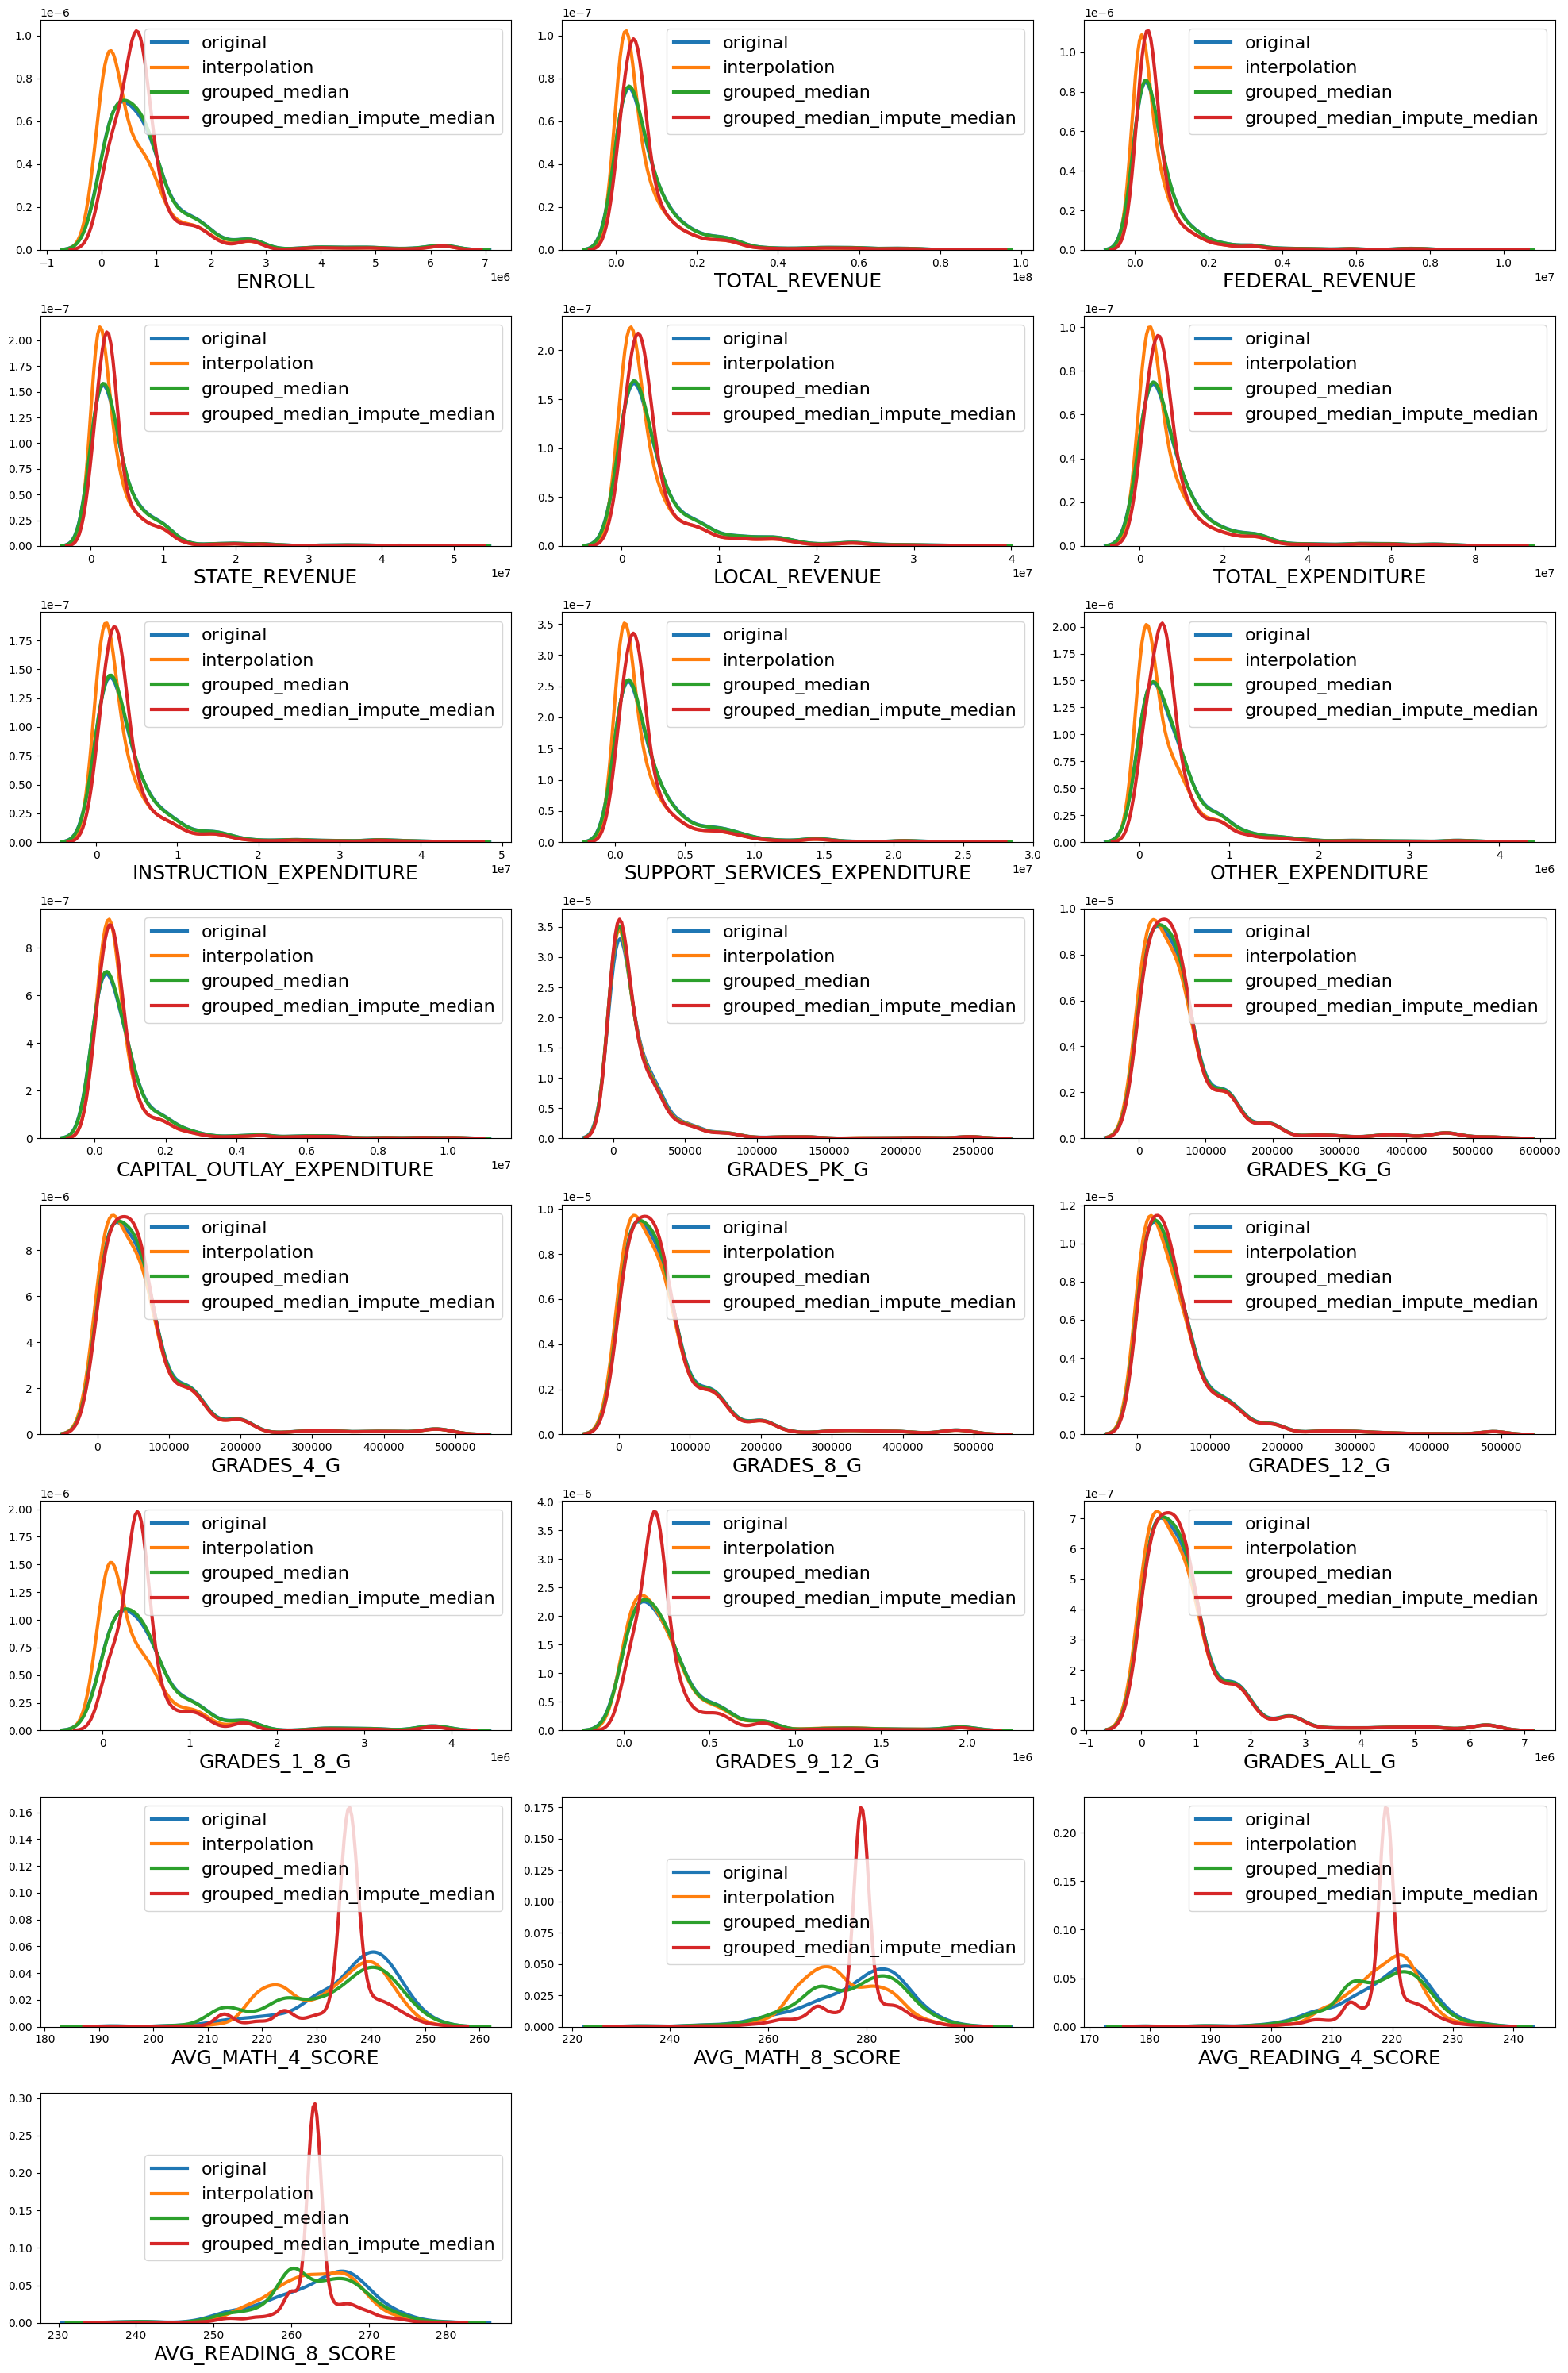

In [47]:
k=0
plt.figure(figsize=(20,30))

for col in df.columns:
  if col in df_datatype.index:
    k += 1
    plt.subplot(8,3,k)

    sns.kdeplot(df[col], label ='original', linewidth=3)
    #sns.kdeplot(df_impute_median[col], label ='imputed_with_median', linewidth=3)
    sns.kdeplot(df_interpolate[col], label = 'interpolation', linewidth=3)
    sns.kdeplot(df_time_series[col], label = 'grouped_median', linewidth=3)
    sns.kdeplot(df_time_series_impute_median[col], label = 'grouped_median_impute_median',linewidth=3)

    plt.xlabel(col, fontsize=18)
    plt.ylabel('', fontsize=18)
    plt.legend(fontsize=16)

plt.tight_layout() 
plt.show()   